In [109]:
import json, operator, random, pandas as pd, numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [110]:
map = mpimg.imread('map.png')

with open('capitals.json', 'r') as capitals_file:
    capitals = json.load(capitals_file)
capitalsList = list(capitals.items())

In [111]:
def showPath(path, starting_city, w=15, h=15):
    x, y = list(zip(*path))
    _, (x0, y0) = starting_city

    plt.imshow(map)
    plt.plot(x + x[:1], y + y[:1], 'g--')
    plt.plot(x + x[:1], y + y[:1], 'r*', markersize=20)
    plt.plot(x0, y0, 'y*', markersize=25)
    plt.axis("off")

    fig = plt.gcf()
    fig.set_size_inches([w, h])

In [112]:
def coords(capitals):
    _, coords = zip(*capitals)
    return coords

In [113]:
def generateIndividual(cityList, popSize):
    population = []

    for i in range(0, popSize):
        population.append(random.sample(cityList, len(cityList)))

    return population

In [114]:
def distance(city1, city2):
    x1, _ = city1
    x2, _ = city2
    _, y1 = city1
    _, y2 = city2

    xDis = abs(x1 - x2)
    yDis = abs(y1 - y2)

    distance = np.sqrt((xDis * xDis) + (yDis * yDis))

    return distance

In [115]:
def fitness(route):
    score = 0

    for i in range(1, len(route)):
        k = route[i - 1]
        l = route[i]
        score = score + distance(k, l)

    return score

In [116]:
def popScore(population):
    fitnessResults = {}

    for i in range(0, len(population)):
        fitnessResults[i] = fitness(population[i])

    return sorted(fitnessResults.items(), key=operator.itemgetter(1), reverse=False)

In [117]:
def selection(popRanked, eliteSize):
    selectionResults = []

    df = pd.DataFrame(np.array(popRanked), columns=["Index", "Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100 * df.cum_sum / df.Fitness.sum()

    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])

    for i in range(0, len(popRanked) - eliteSize):
        pick = 100 * random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i, 3]:
                selectionResults.append(popRanked[i][0])
                break

    return selectionResults

In [118]:
def matingPool(population, selectionResults):
    matingpool = []
    
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])

    return matingpool

In [119]:
def crossover(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []

    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])

    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [120]:
def evolvePopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0, eliteSize):
        children.append(matingpool[i])

    for i in range(0, length):
        child = crossover(pool[i], pool[len(matingpool) - i - 1])
        children.append(child)
    return children

In [121]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if random.random() < mutationRate:
            swapWith = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swapWith]

            individual[swapped] = city2
            individual[swapWith] = city1

    return individual

In [122]:
def mutatePopulation(children, mutationRate):
    newGeneration = []

    for i in children:
        mutatedChild = mutate(i, mutationRate)
        newGeneration.append(mutatedChild)

    return newGeneration

In [123]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = popScore(currentGen)

    selectionResults = selection(popRanked, eliteSize)

    matingpool = matingPool(currentGen, selectionResults)

    children = evolvePopulation(matingpool, eliteSize)

    nextGeneration = mutatePopulation(children, mutationRate)

    return nextGeneration

In [124]:
def geneticAlgorithm(capitalsList, popSize, eliteSize, mutationRate, generations):
    cityList = coords(capitalsList)
    progress = []

    pop = generateIndividual(cityList, popSize)

    print(f'Initial distance={popScore(pop)[0][1]}')

    progress.append(popScore(pop)[0][1])

    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(popScore(pop)[0][1])

    print(f'Final distance={popScore(pop)[0][1]}')

    bestRouteIndex = popScore(pop)[0][0]

    bestRoute = pop[bestRouteIndex]

    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    return bestRoute

Initial distance=10028.442823537762
Final distance=5444.332771049834


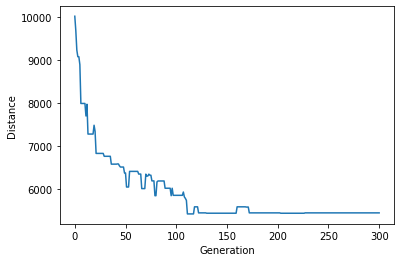

In [125]:
numCities = 15

bestRoute = geneticAlgorithm(
    capitalsList[:numCities],
    popSize=100,
    eliteSize=30,
    mutationRate=0.01,
    generations=300,
)

Best route=[[1930, 652], [1830, 1112], [2110, 1594], [1570, 1926], [1210, 1600], [883, 1680], [617, 1335], [1050, 1095], [858, 872], [613, 830], [621, 592], [375, 369], [740, 511], [960, 732], [1139, 617]]


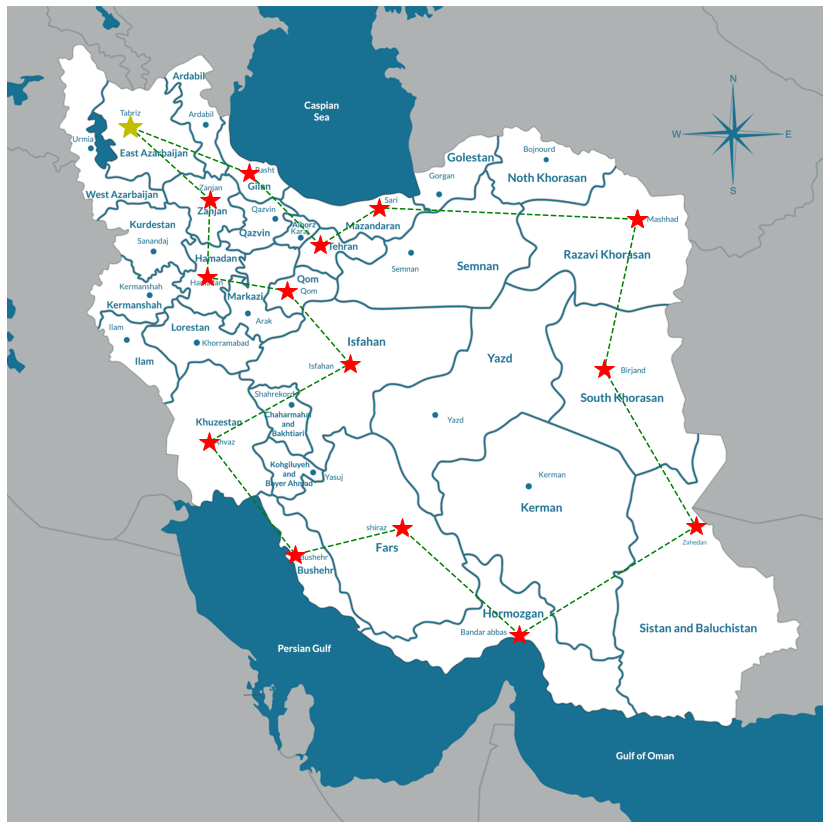

In [126]:
print(f'Best route={bestRoute}')

showPath(bestRoute, capitalsList[0])